In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('strong_scaling_results.txt', sep=' ', header=None)

In [44]:
df.columns = ['time', 'nworkers', 'blocksize', 'N']


In [45]:
# drop blocksize column
df.drop('blocksize', axis=1, inplace=True)

In [46]:
# group by nworkers
grouped = df.groupby('nworkers')

In [47]:
# delete max and min values for each group
df = grouped.apply(lambda x: x[(x['time'] != x['time'].max()) & (x['time'] != x['time'].min())])

In [48]:
# reset index
df = df.reset_index(drop=True)

In [49]:
df 

,time,nworkers,N
0,7.249650,1,2048
1,7.300680,1,2048
2,7.245740,1,2048
3,7.229180,1,2048
4,7.194270,1,2048
...,...,...,...
83,0.785792,20,2048
84,0.783223,20,2048
85,0.795777,20,2048
86,0.796656,20,2048


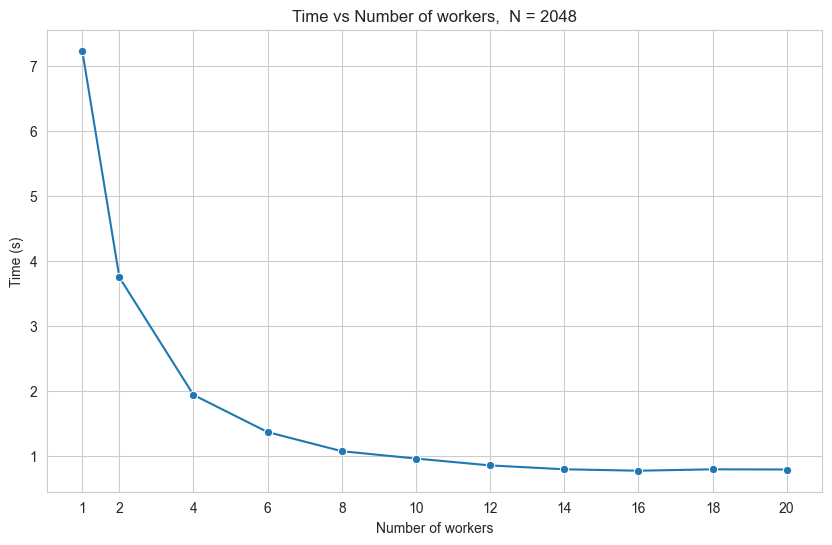

In [50]:
df = df.groupby('nworkers').mean().reset_index()
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='nworkers', y='time', linestyle='-', marker='o')
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.xticks(df['nworkers'])
plt.title(f'Time vs Number of workers,  N = {int(df["N"][0])}')
plt.savefig('images/strong_scaling.png')


In [51]:
df['scalability'] = df['time'][0] / df['time']
df

,nworkers,time,N,scalability
0,1,7.232705,2048.0,1.000000
1,2,3.746230,2048.0,1.930662
2,4,1.935335,2048.0,3.737185
3,6,1.363264,2048.0,5.305433
4,8,1.069681,2048.0,6.761552
5,10,0.956413,2048.0,7.562323
6,12,0.850768,2048.0,8.501387
7,14,0.791223,2048.0,9.141168
8,16,0.769121,2048.0,9.403861
9,18,0.790697,2048.0,9.147248


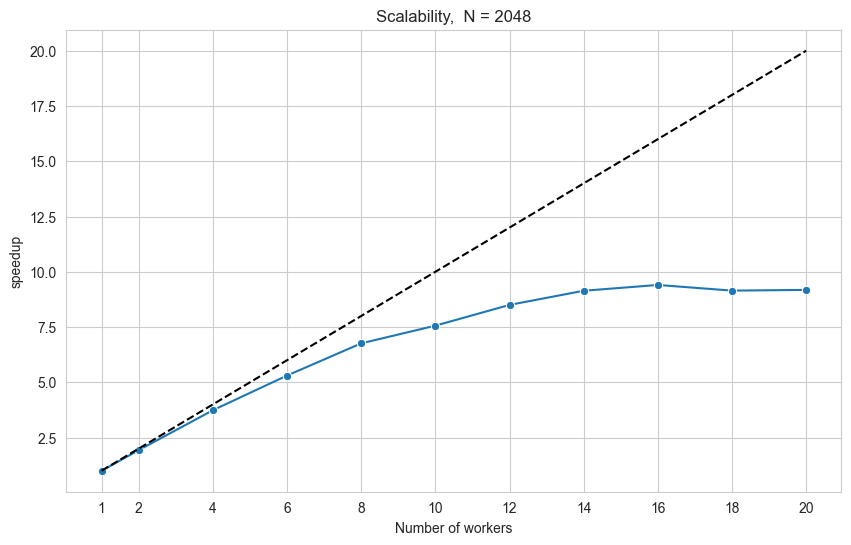

In [54]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='nworkers', y='scalability', linestyle='-', marker='o')
# plot ideal speedup
plt.plot(df['nworkers'], df['nworkers'], linestyle='--', color='black')
plt.xlabel('Number of workers')
plt.ylabel('speedup')
plt.xticks(df['nworkers'])
plt.title(f'Scalability,  N = {int(df["N"][0])}')
plt.savefig('images/scalability.png')